In [ ]:
# import nedded libraries
import pandas as pd
import numpy as np

#Data visualisation libraries 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-poster')

from IPython.display import display

# Machine Learning Algorithms 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

%matplotlib inline

# importing and investigate the dataset

In [ ]:
# importing the dataset and investigate the features 
Well = pd.read_csv(r'/content/drive/MyDrive/Earthid/well1513.csv')
display(Well.head())
display(Well.info())
display(Well.describe())
display(Well.columns)

,Unnamed: 0,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18270 non-null  int64  
 1   WELL                               18270 non-null  object 
 2   DEPTH_MD                           18270 non-null  float64
 3   X_LOC                              18270 non-null  float64
 4   Y_LOC                              18270 non-null  float64
 5   Z_LOC                              18270 non-null  float64
 6   GROUP                              18270 non-null  object 
 7   FORMATION                          15806 non-null  object 
 8   CALI                               18270 non-null  float64
 9   RSHA                               1623 non-null   float64
 10  RMED                               18270 non-null  float64
 11  RDEP                               18270 non-null  flo

None

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000,18270.000000,1623.000000,18270.000000,18270.000000,18270.000000,18270.000000,0.0,14032.000000,16440.000000,18189.000000,18270.000000,0.0,18161.000000,0.0,0.0,18270.000000,17464.000000,0.0,0.0,1627.000000,18270.000000,18270.000000
mean,9134.500000,1883.228478,437627.322429,6.470979e+06,-1857.985240,14.789688,2.901504,1.835372,1.832040,2.110451,63.847477,NaN,0.404547,3.463851,125.106178,70.711441,NaN,27.115614,NaN,NaN,0.012675,0.139777,NaN,NaN,5.748493,60476.696223,1.039080
std,5274.239045,801.941195,14.359784,3.508944e+00,801.742890,4.377047,3.474120,2.891524,2.197939,0.297725,28.636331,NaN,0.133532,2.561239,30.618337,33.807814,NaN,30.452190,NaN,NaN,0.047393,0.009454,NaN,NaN,71.588789,13972.748152,0.276835
min,0.000000,494.528000,437593.343750,6.470972e+06,-3246.156250,8.186605,0.175400,0.374989,0.352202,1.404576,6.191506,NaN,0.024330,1.010027,55.726753,22.163542,NaN,0.138586,NaN,NaN,-0.679026,0.129413,NaN,NaN,0.171424,30000.000000,1.000000
25%,4567.250000,1188.750000,437614.812500,6.470976e+06,-2552.392883,12.125232,0.934778,0.782044,0.799976,1.963399,43.866690,NaN,0.315346,2.320836,90.883087,49.436234,NaN,4.727499,NaN,NaN,-0.007219,0.133007,NaN,NaN,0.934500,65000.000000,1.000000
50%,9134.500000,1882.972000,437631.187500,6.470978e+06,-1857.799133,13.913155,1.473143,1.211789,1.293638,2.055079,66.777851,NaN,0.448527,2.790249,141.300461,62.319136,NaN,30.297560,NaN,NaN,0.001565,0.136602,NaN,NaN,1.455721,65000.000000,1.000000
75%,13701.750000,2577.802000,437640.781250,6.470982e+06,-1163.699371,18.309367,3.352066,2.067438,2.085021,2.381963,81.542681,NaN,0.506343,4.267342,148.048355,92.675003,NaN,39.995598,NaN,NaN,0.020022,0.144990,NaN,NaN,3.464941,65000.000000,1.000000
max,18269.000000,3272.024000,437642.812500,6.470984e+06,-469.501831,23.329569,54.536583,142.606338,49.221905,2.927888,499.022583,NaN,0.800262,66.030319,175.953140,151.198853,NaN,1083.425415,NaN,NaN,0.210927,0.156973,NaN,NaN,2000.000000,99000.000000,3.000000


Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP',
       'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR',
       'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

# Data Wrangling process

## Dropping irrelevant columns (features)

In [ ]:
Well_Ed = Well.drop(columns = ['Unnamed: 0','WELL','GROUP', 'FORMATION','FORCE_2020_LITHOFACIES_CONFIDENCE'], axis= 1)

## check the histogram

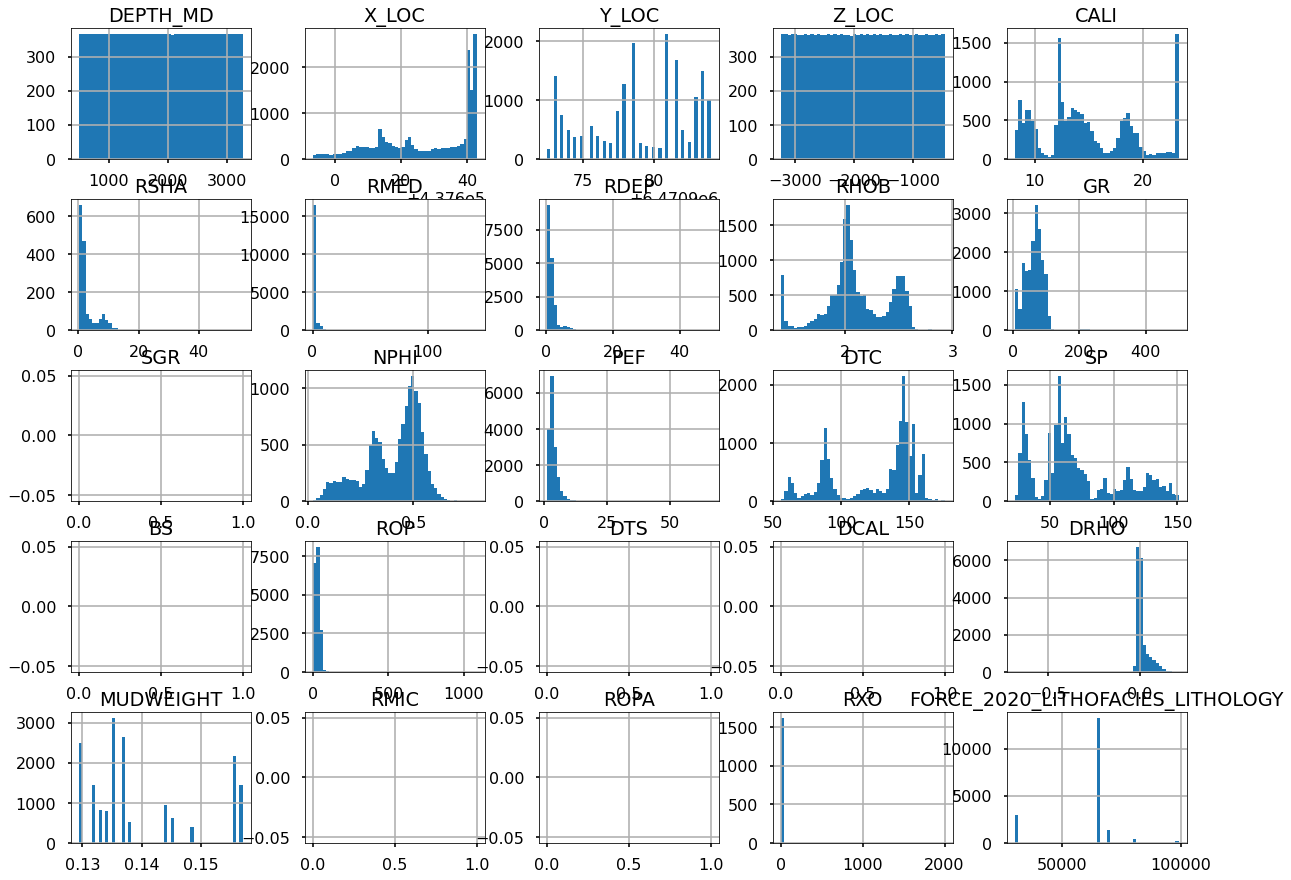

In [ ]:
Well_Ed.hist(bins=50, figsize=(20,15))
plt.show()

## Plot well logs and facies log 

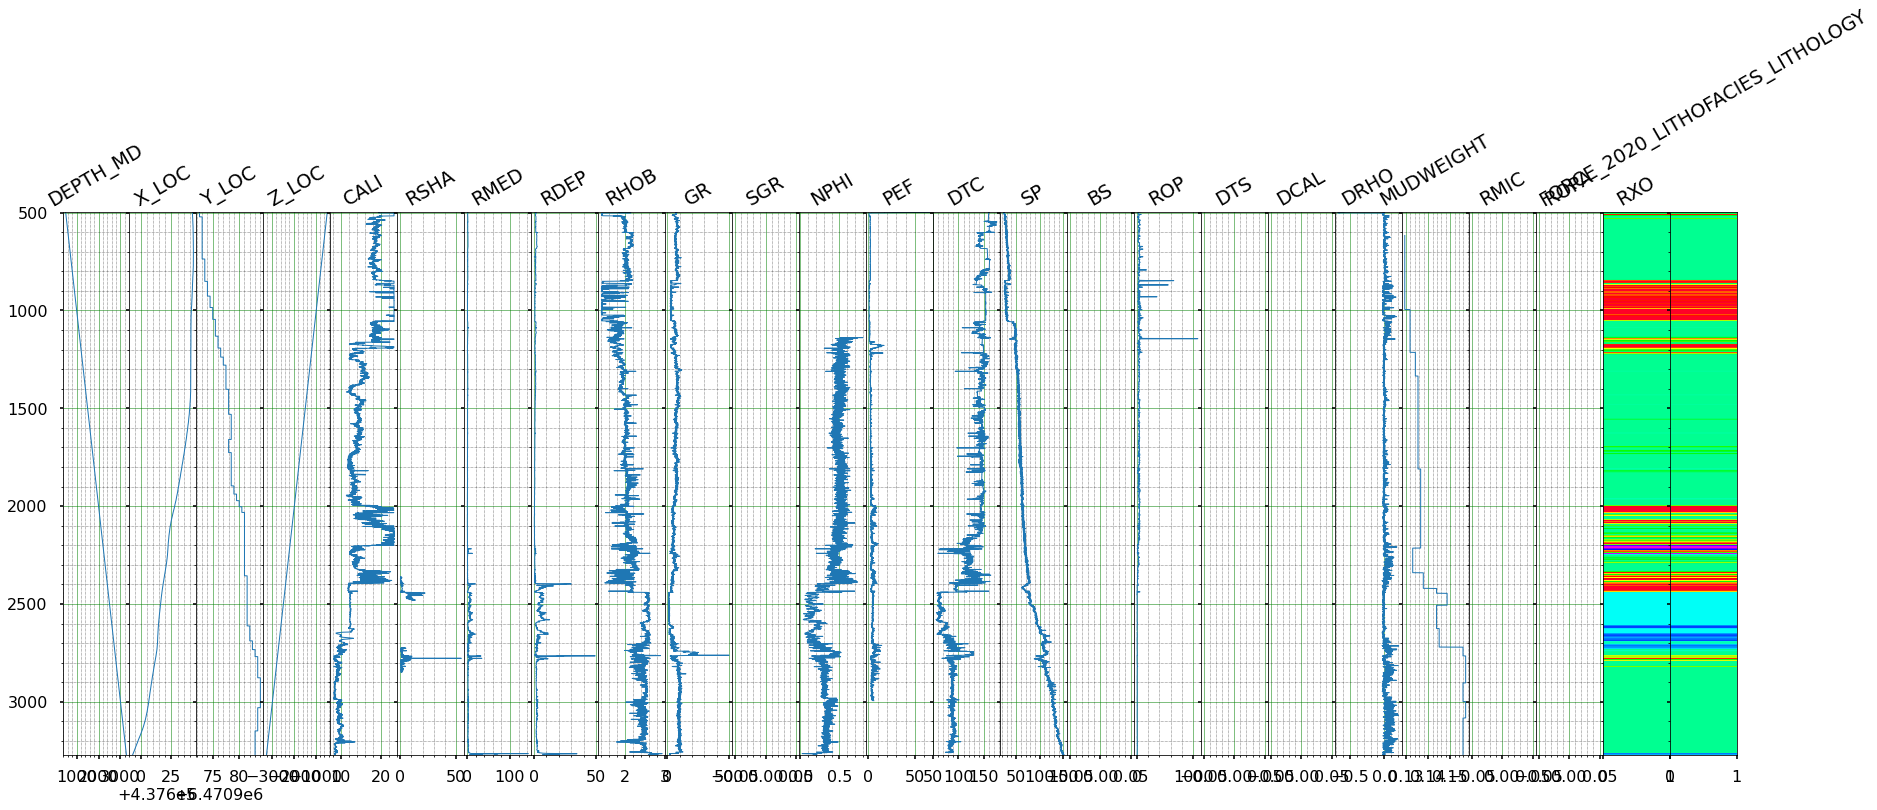

In [ ]:
rows, cols = 1,Well_Ed.shape[1]
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(30,10), sharey=True)
mnemonics = Well_Ed.columns
for i in range(cols):
    if i < cols-2:
        ax[i].plot(Well_Ed.iloc[:,i], Well_Ed.iloc[:,0],linewidth='1')
        ax[i].set_ylim(max(Well_Ed.iloc[:, 0]), min(Well_Ed.iloc[:, 0]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black') #this is a comment
        ax[i].set_title('%s' %mnemonics[i], rotation = 30)
    elif i >= cols-2:
        F = np.vstack((Well_Ed.FORCE_2020_LITHOFACIES_LITHOLOGY,Well_Ed.FORCE_2020_LITHOFACIES_LITHOLOGY)).T
        ax[i].imshow(F, aspect='auto', cmap = 'gist_rainbow',extent=[0,1,max(Well_Ed.iloc[:, 0]), min(Well_Ed.iloc[:, 0])])
        ax[i].set_title('%s' % mnemonics[i], rotation = 30)
plt.subplots_adjust(wspace=0)
plt.show();

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r'

## "Null Values" Manupilation and removing all the NA 

In [ ]:
## Converting -999.25 "Null Values" and removing all the NA 
Well_Ed.replace(-999.25, np.nan, inplace=True)
display(np.round(Well_Ed.isna().sum()/Well_Ed.shape[0]*100,2))

DEPTH_MD                              0.00
X_LOC                                 0.00
Y_LOC                                 0.00
Z_LOC                                 0.00
CALI                                  0.00
RSHA                                 91.12
RMED                                  0.00
RDEP                                  0.00
RHOB                                  0.00
GR                                    0.00
SGR                                 100.00
NPHI                                 23.20
PEF                                  10.02
DTC                                   0.44
SP                                    0.00
BS                                  100.00
ROP                                   0.60
DTS                                 100.00
DCAL                                100.00
DRHO                                  0.00
MUDWEIGHT                             4.41
RMIC                                100.00
ROPA                                100.00
RXO        

In [ ]:
display(Well_Ed.isna().sum())

DEPTH_MD                                0
X_LOC                                   0
Y_LOC                                   0
Z_LOC                                   0
CALI                                    0
RSHA                                16647
RMED                                    0
RDEP                                    0
RHOB                                    0
GR                                      0
SGR                                 18270
NPHI                                 4238
PEF                                  1830
DTC                                    81
SP                                      0
BS                                  18270
ROP                                   109
DTS                                 18270
DCAL                                18270
DRHO                                    0
MUDWEIGHT                             806
RMIC                                18270
ROPA                                18270
RXO                               

### plotting NA Values using plotly

In [ ]:
import plotly.express as px

nadata = pd.DataFrame(Well_Ed.isna().sum())
fig = px.bar(nadata, x=nadata.index, y=nadata,
             title="well1513 NA",
             color=nadata
             )
fig.update_xaxes(title_text='Log names')
fig.update_yaxes(title_text='Number of NA')

fig.show()

In [ ]:
# Change the coumn name 
Well_Ed['LithoFacies'] = Well_Ed[['FORCE_2020_LITHOFACIES_LITHOLOGY']]

# filter the data set without high NA columns 
filtered_Well_Ed = Well_Ed[['DEPTH_MD', 'CALI','RMED', 'RDEP', 'RHOB', 'GR','PEF',
                            'NPHI','DTC','ROP','MUDWEIGHT','LithoFacies']]

In [ ]:
filt_nadata = pd.DataFrame(filtered_Well_Ed.isna().sum())
fig1 = px.bar(filt_nadata, x=filt_nadata.index, y=filt_nadata,
             title="Filtered_Well_Ed NA",
             color=filt_nadata,text = filt_nadata)

fig1.update_xaxes(title_text='Log names')
fig1.update_yaxes(title_text='Number of NA')

fig1.show()

In [ ]:
# Dropping NA Values 
NA_filtered_Well_Ed = filtered_Well_Ed.dropna()


### QC NA Values after dropping

In [ ]:
NA_filtered_Well_Ed.isna().sum()

DEPTH_MD       0
CALI           0
RMED           0
RDEP           0
RHOB           0
GR             0
PEF            0
NPHI           0
DTC            0
ROP            0
MUDWEIGHT      0
LithoFacies    0
dtype: int64

In [ ]:
print("the size of the data now is : ",NA_filtered_Well_Ed.shape)

the size of the data now is :  (12093, 12)


# Check for Co-lineality and high correlation

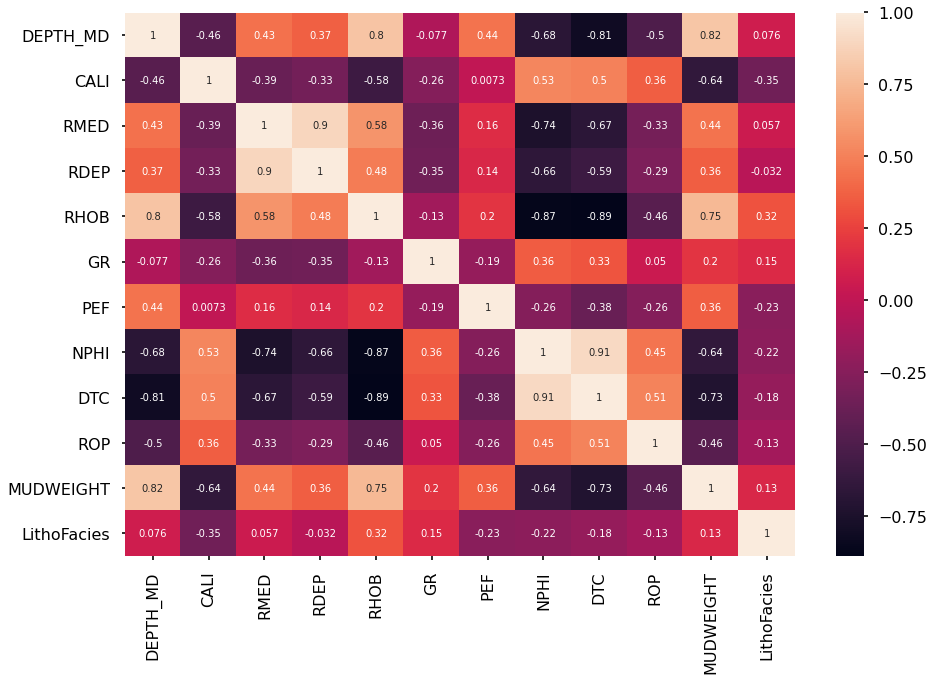

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(NA_filtered_Well_Ed.corr(),annot=True);

### Dropping correlated feature

In [ ]:
NA_filtered_Well_Ed.drop(['RMED', 'NPHI'], axis= 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#QC dataset
print("the size of the data now is : ",NA_filtered_Well_Ed.shape)
NA_filtered_Well_Ed.columns

the size of the data now is :  (12093, 10)


Index(['DEPTH_MD', 'CALI', 'RDEP', 'RHOB', 'GR', 'PEF', 'DTC', 'ROP',
       'MUDWEIGHT', 'LithoFacies'],
      dtype='object')

In [ ]:
Xdata = NA_filtered_Well_Ed.drop(columns=['LithoFacies'])
ydata = NA_filtered_Well_Ed['LithoFacies']
print(Xdata.shape)
print(ydata.shape)

(12093, 9)
(12093,)


### Renumebering Facies as per software used 

In [ ]:
'''
lithology_keys = {30000: 'Sandstone',
                     65030: 'Sandstone/Shale',
                     65000: 'Shale',
                     80000: 'Marl',
                     74000: 'Dolomite',
                     70000: 'Limestone',
                     70032: 'Chalk',
                     88000: 'Halite',
                     86000: 'Anhydrite',
                     99000: 'Tuff',
                     90000: 'Coal',
                     93000: 'Basement'}
'''
NA_filtered_Well_Ed.drop(columns=['LithoFacies'], inplace= True)

lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

ydata = ydata.map(lithology_numbers)

Well.FORCE_2020_LITHOFACIES_LITHOLOGY= ydata.map(lithology_numbers)
NA_filtered_Well_Ed['Facies'] = ydata

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
NA_filtered_Well_Ed

,DEPTH_MD,CALI,RDEP,RHOB,GR,PEF,DTC,ROP,MUDWEIGHT,Facies
4238,1138.704,19.322735,1.091499,1.774626,55.892757,1.631495,147.837677,84.680267,0.131809,0
4239,1138.856,18.613674,1.122706,1.800986,60.929138,1.645080,142.382431,84.598869,0.131809,2
4240,1139.008,18.212072,1.148141,1.817696,62.117264,1.645873,138.258331,80.529831,0.131809,2
4241,1139.160,18.134182,1.170984,1.829333,61.010860,1.620216,139.198914,59.596161,0.131809,2
4242,1139.312,18.033762,1.184080,1.813854,58.501236,1.504854,144.290085,56.803669,0.131809,2
...,...,...,...,...,...,...,...,...,...,...
16435,2993.256,9.580834,2.511882,2.468236,90.537521,4.699200,86.474564,3.740737,0.155774,2
16436,2993.408,9.656811,2.471810,2.457519,88.819122,4.699200,86.187599,3.740737,0.155774,2
16437,2993.560,9.569174,2.460973,2.429228,92.128922,4.699200,87.797836,3.740737,0.155774,2
16438,2993.712,9.487338,2.439887,2.425479,95.870255,5.224292,88.108452,3.718340,0.155774,2
